In [1]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("Survey Pengguna Handphone2.csv")
#Categorize categorical variable into number
cat_replace = {'pemasukan': {"< Rp 1.000.000": 1, "Rp 1.000.001 - Rp 2.000.000": 2, "Rp 2.000.001 - Rp 3.000.000": 3,"Rp 3.000.001 - Rp 5.000.000": 4, "Rp 5.000.001 - Rp 10.000.000": 5, "> Rp 10.000.001": 6},
               'uang kuota':{"0 - Rp 50.000": 1, "Rp 50.001 - Rp 100.000": 2, "Rp 100.001 - Rp 200.000" : 3,"Rp 200.001 - Rp 500.000": 4, "> Rp 500.001": 5},              
                'merk':{"Samsung": 13,"Xiaomi": 11,"Oppo": 8,"iPhone": 14,"Asus": 3,"Vivo": 4,"Selain di atas": 1,"LG": 10,                 
                        "Nokia": 9,"Lenovo": 6,"Huawei": 12,"SONY": 7,"Realme": 2,"Motorola": 5},
               'pekerjaan':{"Karyawan Swasta": 16,"PNS / BUMN / Pegawai Pemerintah": 17,"Pelajar": 2,"Guru atau dosen": 15,                                         
                        "Ibu Rumah Tangga": 3,"Wiraswasta / Pedagang": 11,"Pekerja Lepas / Freelancer": 10,                              
                        "Pekerja Medis (Dokter / Bidan / Apoteker / Perawat)": 13,"Tidak bekerja": 1,                                           
                        "Karyawan Honorer": 9,"Peneliti": 14,"Buruh": 8,"Petani / Pekebun / Peternak": 6,                              
                        "Polisi atau TNI": 12,"Pensiunan": 7,"Pembantu Rumah Tangga": 5,"Sopir": 4,"Investor": 18},
               'level':{"very low risk": 1,"low risk": 2,"medium risk": 3,"high risk": 4,"very high risk": 5},
               }
data2 = data.copy()
data2.replace(cat_replace, inplace = True)
data2.head()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis,level
0,5,17,4,13,5,3,5,3,3,3,1,1
1,4,16,2,8,2,1,4,4,4,2,4,2
2,4,17,2,13,1,1,5,2,1,1,5,2
3,6,16,2,8,2,1,4,3,3,2,1,1
4,5,17,4,13,1,5,5,5,1,1,1,1


In [3]:
unsup = data2.drop('level',axis=1)
unsup.head()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis
0,5,17,4,13,5,3,5,3,3,3,1
1,4,16,2,8,2,1,4,4,4,2,4
2,4,17,2,13,1,1,5,2,1,1,5
3,6,16,2,8,2,1,4,3,3,2,1
4,5,17,4,13,1,5,5,5,1,1,1


In [4]:
unsup.describe()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,3.829132,12.179272,2.491597,10.148459,1.627451,2.364146,3.728291,3.219888,2.309524,2.535014,1.455182
std,1.644044,5.649542,0.947759,3.724801,1.049211,1.199183,1.276219,1.254712,1.178700,1.223671,0.916627
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,9.000000,2.000000,8.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
50%,4.000000,16.000000,2.000000,11.000000,1.000000,2.000000,4.000000,3.000000,2.000000,3.000000,1.000000
75%,5.000000,16.000000,3.000000,13.000000,2.000000,3.000000,5.000000,4.000000,3.000000,3.000000,2.000000
max,6.000000,18.000000,5.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#standarized data to normal distribution
from sklearn import preprocessing
data1_standarized = preprocessing.scale(unsup)
data1_standarized = pd.DataFrame(data1_standarized)

In [8]:
data1_standarized.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.712687,0.853894,1.592664,0.766092,3.216619,0.530611,0.997164,-0.175373,0.586205,0.380259,-0.496932
1,0.104005,0.676764,-0.519058,-0.577203,0.355324,-1.138360,0.213051,0.622182,1.435192,-0.437527,2.778232
2,0.104005,0.853894,-0.519058,0.766092,-0.598441,-1.138360,0.997164,-0.972927,-1.111769,-1.255313,3.869954
3,1.321370,0.676764,-0.519058,-0.577203,0.355324,-1.138360,0.213051,-0.175373,0.586205,-0.437527,-0.496932
4,0.712687,0.853894,1.592664,0.766092,-0.598441,2.199583,0.997164,1.419736,-1.111769,-1.255313,-0.496932


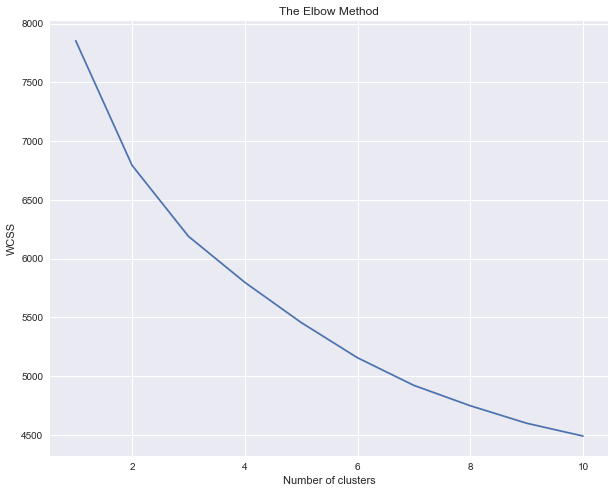

In [12]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data1_standarized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
#KMeans 
#fitting kmeans to dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1_standarized)

#beginning of the cluster with 1
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1

#New dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

#adding cluster to dataset
unsup['cluster'] = cluster

#Mean of cluster
kmeans_mean_cluster = pd.DataFrame(round(unsup.groupby('cluster').mean(),1))
kmeans_mean_cluster

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis
cluster,,,,,,,,,,,
1,3.8,12.9,2.6,9.5,1.9,2.3,4.0,3.4,3.0,3.0,3.9
2,5.0,15.1,3.0,11.6,1.7,2.8,4.2,3.4,1.7,1.8,1.2
3,1.9,3.3,2.0,10.8,1.6,1.9,4.0,3.3,2.7,3.1,1.4
4,3.6,13.0,1.9,9.8,1.4,2.0,2.2,2.3,1.6,1.8,1.1
5,4.2,15.1,2.7,8.3,1.7,2.5,4.1,3.7,3.1,3.4,1.2


In [ ]:
# Assigning the clusters and plotting the observations as per kmeans clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_1 = fcluster(H_cluster, k, criterion='maxclust')
cluster_1[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(data1_standarized.iloc[:,0], data2_standarized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Trustworthiness Data - Kmeans Clutering')
plt.show()

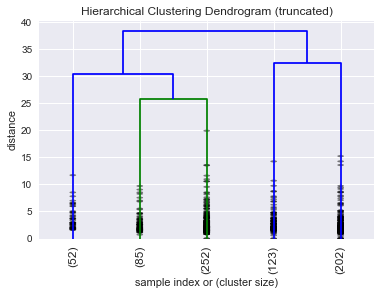

In [14]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
data2_standarized = data1_standarized
# needed imports
from scipy.cluster.hierarchy import dendrogram, linkage

# some setting for this notebook to actually show the graphs inline
# you probably won't need this
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(data2_standarized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

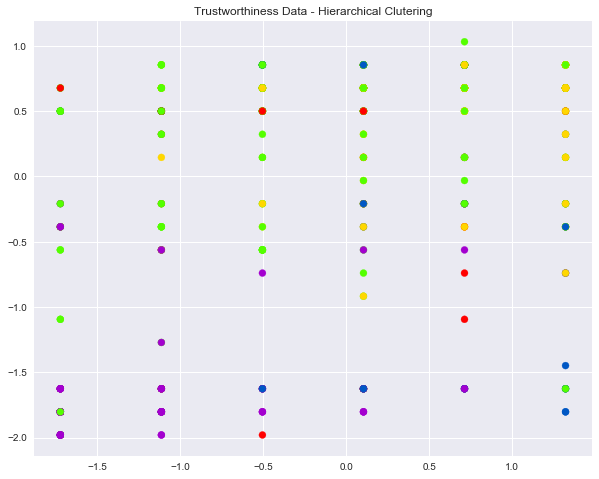

In [16]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(data2_standarized.iloc[:,0], data2_standarized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Trustworthiness Data - Hierarchical Clutering')
plt.show()

In [17]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset2=unsup
dataset2['cluster'] = cluster_Hierarchical
dataset2.head()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis,cluster
0,5,17,4,13,5,3,5,3,3,3,1,3
1,4,16,2,8,2,1,4,4,4,2,4,1
2,4,17,2,13,1,1,5,2,1,1,5,1
3,6,16,2,8,2,1,4,3,3,2,1,2
4,5,17,4,13,1,5,5,5,1,1,1,3
